In [1]:
import re
%pylab inline
import pandas as pd
import time
import numpy as np
import pickle
import joblib
from joblib import Parallel, delayed
import os
import csv
import datetime as dt
from datetime import date, datetime, timedelta
from sklearn import svm, preprocessing
from collections import Counter
import seaborn as sns
import re

plt.style.use('ggplot') 
pd.set_option('display.max_columns', None)

Populating the interactive namespace from numpy and matplotlib


In [3]:
with open("pickles/filteredFramesNew2.pkl",'rb') as f: frames = pickle.load(f)

In [120]:
frames[hadmsList[1808]]

,timestamp,hadm,subject,icudays,admittype,ethnicity,gender,age,weight,ventilated,sbt,Heart Rate,Respiratory Rate,O2 saturation pulseoxymetry,Non Invasive Blood Pressure mean,O2 Flow,Inspired O2 Fraction,Arterial CO2 Pressure,PH (Arterial),Arterial O2 pressure,Mean Airway Pressure,Ventilator Mode,Peak Insp. Pressure,Plateau Pressure,Minute Volume,Tidal Volume (observed),PEEP set,Creatinine,Hematocrit (serum),BUN,Fentanyl (Concentrate),Midazolam (Versed),Propofol,Fentanyl,Dexmedetomidine (Precedex),Morphine Sulfate,Hydromorphone (Dilaudid),Lorazepam (Ativan)
2102-01-06 04:00:00,2102-01-06 04:00:00,131151,40442,14,1,1,0,86,75.0,0,NaN,86.666667,32.666667,99.333333,50.0,NaN,100.0,36.0,7.32,389.0,13.0,49.0,26.0,NaN,21.40,488.0,5.0,3.2,33.5,89.0,0,0,1171,25,0,0,0,0
2102-01-06 05:00:00,2102-01-06 05:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,82.000000,35.000000,100.000000,69.0,NaN,60.0,36.0,7.32,389.0,11.0,49.0,14.0,9.0,17.20,520.0,5.0,3.2,33.5,89.0,0,1967,0,95,0,0,0,0
2102-01-06 06:00:00,2102-01-06 06:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,85.000000,22.000000,100.000000,71.0,NaN,60.0,36.0,7.32,389.0,11.0,49.0,14.0,9.0,17.20,520.0,5.0,3.2,33.5,89.0,0,1664,0,84,0,0,0,0
2102-01-06 07:00:00,2102-01-06 07:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,91.000000,16.000000,99.000000,66.0,NaN,60.0,36.0,7.32,389.0,11.0,49.0,14.0,9.0,17.20,520.0,5.0,3.2,33.5,89.0,0,1513,0,79,0,0,0,0
2102-01-06 08:00:00,2102-01-06 08:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,84.000000,18.000000,99.000000,64.0,NaN,60.0,36.0,7.32,389.0,11.0,49.0,14.0,9.0,17.20,520.0,5.0,3.2,33.5,89.0,0,1361,0,73,0,0,0,0
2102-01-06 09:00:00,2102-01-06 09:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,82.000000,32.000000,99.500000,69.0,NaN,50.0,36.0,7.32,389.0,7.0,11.0,14.0,9.0,12.90,521.0,5.0,3.2,33.5,89.0,0,1210,0,68,0,0,0,0
2102-01-06 10:00:00,2102-01-06 10:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,80.000000,21.000000,98.000000,63.0,NaN,50.0,36.0,7.32,389.0,7.0,11.0,14.0,9.0,12.90,521.0,5.0,3.2,33.5,86.0,0,1059,0,63,0,0,0,0
2102-01-06 11:00:00,2102-01-06 11:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,80.000000,23.000000,99.000000,67.0,NaN,50.0,36.0,7.32,389.0,7.0,11.0,14.0,9.0,12.90,521.0,5.0,3.2,33.5,86.0,0,908,0,57,0,0,0,0
2102-01-06 12:00:00,2102-01-06 12:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,83.000000,23.000000,99.000000,67.0,NaN,50.0,32.0,7.34,95.0,7.0,11.0,14.0,9.0,12.50,587.0,5.0,3.2,33.5,86.0,0,756,0,52,0,0,0,0
2102-01-06 13:00:00,2102-01-06 13:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,92.000000,25.000000,98.000000,NaN,NaN,50.0,32.0,7.34,95.0,7.0,11.0,14.0,9.0,12.50,587.0,5.0,3.2,33.5,86.0,0,605,0,47,0,0,0,0


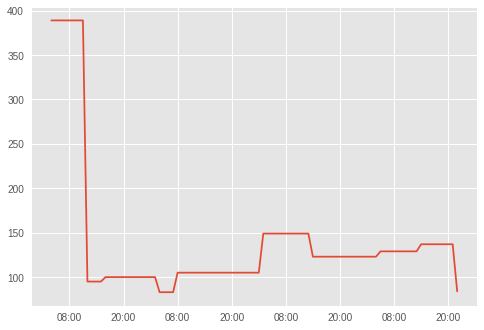

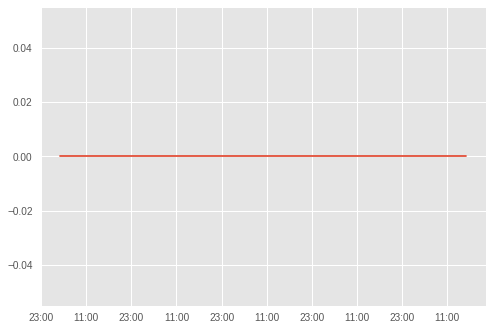

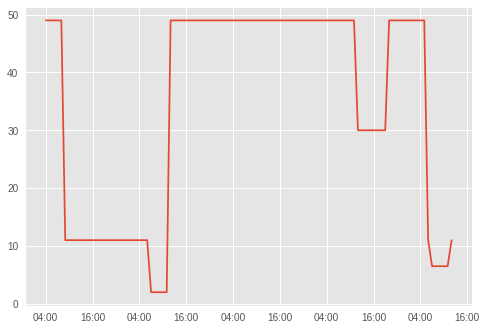

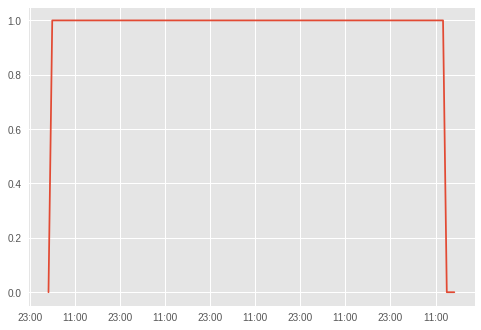

In [121]:
#k=frames.keys()[k]
k = hadmsList[1808]
plot(frames[k]['Arterial O2 pressure'])
figure()
plot(frames[k]['Hydromorphone (Dilaudid)'])
figure()
plot(frames[k]['Ventilator Mode'])
figure()
plot(frames[k]['ventilated'])

In [114]:
frames[k]

,timestamp,hadm,subject,icudays,admittype,ethnicity,gender,age,weight,ventilated,sbt,Heart Rate,Respiratory Rate,O2 saturation pulseoxymetry,Non Invasive Blood Pressure mean,O2 Flow,Inspired O2 Fraction,Arterial CO2 Pressure,PH (Arterial),Arterial O2 pressure,Mean Airway Pressure,Ventilator Mode,Peak Insp. Pressure,Plateau Pressure,Minute Volume,Tidal Volume (observed),PEEP set,Creatinine,Hematocrit (serum),BUN,Fentanyl (Concentrate),Midazolam (Versed),Propofol,Fentanyl,Dexmedetomidine (Precedex),Morphine Sulfate,Hydromorphone (Dilaudid),Lorazepam (Ativan)
2102-01-06 04:00:00,2102-01-06 04:00:00,131151,40442,14,1,1,0,86,75.0,0,NaN,86.666667,32.666667,99.333333,50.0,NaN,100.0,36.0,7.32,389.0,13.0,49.0,26.0,NaN,21.40,488.0,5.0,3.2,33.5,89.0,0,0,1171,25,0,0,0,0
2102-01-06 05:00:00,2102-01-06 05:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,82.000000,35.000000,100.000000,69.0,NaN,60.0,36.0,7.32,389.0,11.0,49.0,14.0,9.0,17.20,520.0,5.0,3.2,33.5,89.0,0,1967,0,95,0,0,0,0
2102-01-06 06:00:00,2102-01-06 06:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,85.000000,22.000000,100.000000,71.0,NaN,60.0,36.0,7.32,389.0,11.0,49.0,14.0,9.0,17.20,520.0,5.0,3.2,33.5,89.0,0,1664,0,84,0,0,0,0
2102-01-06 07:00:00,2102-01-06 07:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,91.000000,16.000000,99.000000,66.0,NaN,60.0,36.0,7.32,389.0,11.0,49.0,14.0,9.0,17.20,520.0,5.0,3.2,33.5,89.0,0,1513,0,79,0,0,0,0
2102-01-06 08:00:00,2102-01-06 08:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,84.000000,18.000000,99.000000,64.0,NaN,60.0,36.0,7.32,389.0,11.0,49.0,14.0,9.0,17.20,520.0,5.0,3.2,33.5,89.0,0,1361,0,73,0,0,0,0
2102-01-06 09:00:00,2102-01-06 09:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,82.000000,32.000000,99.500000,69.0,NaN,50.0,36.0,7.32,389.0,7.0,11.0,14.0,9.0,12.90,521.0,5.0,3.2,33.5,89.0,0,1210,0,68,0,0,0,0
2102-01-06 10:00:00,2102-01-06 10:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,80.000000,21.000000,98.000000,63.0,NaN,50.0,36.0,7.32,389.0,7.0,11.0,14.0,9.0,12.90,521.0,5.0,3.2,33.5,86.0,0,1059,0,63,0,0,0,0
2102-01-06 11:00:00,2102-01-06 11:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,80.000000,23.000000,99.000000,67.0,NaN,50.0,36.0,7.32,389.0,7.0,11.0,14.0,9.0,12.90,521.0,5.0,3.2,33.5,86.0,0,908,0,57,0,0,0,0
2102-01-06 12:00:00,2102-01-06 12:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,83.000000,23.000000,99.000000,67.0,NaN,50.0,32.0,7.34,95.0,7.0,11.0,14.0,9.0,12.50,587.0,5.0,3.2,33.5,86.0,0,756,0,52,0,0,0,0
2102-01-06 13:00:00,2102-01-06 13:00:00,131151,40442,14,1,1,0,86,75.0,1,NaN,92.000000,25.000000,98.000000,NaN,NaN,50.0,32.0,7.34,95.0,7.0,11.0,14.0,9.0,12.50,587.0,5.0,3.2,33.5,86.0,0,605,0,47,0,0,0,0


In [2]:
with open("pickles/preppedBaseFrames2.pkl",'rb') as f: allSamples, hadmsList, currStates, nextStates, actions, rewards = pickle.load(f)

In [3]:
len(unique(hadmsList)), len(hadmsList)

(2030, 263866)

In [16]:
static = ['admittype', 'ethnicity', 'gender', 'age', 'weight']
vitals = ['Heart Rate', 'Respiratory Rate','O2 saturation pulseoxymetry', 'Non Invasive Blood Pressure mean', 
        'O2 Flow', 'Inspired O2 Fraction', 'Arterial CO2 Pressure', 'PH (Arterial)', 'Arterial O2 pressure', 
        'Mean Airway Pressure', 'Ventilator Mode', 'Peak Insp. Pressure', 'Plateau Pressure', 'Minute Volume', 
        'Tidal Volume (observed)', 'PEEP set', 'Creatinine', 'Hematocrit (serum)', 'BUN']
inputs = ['Fentanyl (Concentrate)', 'Midazolam (Versed)', 'Propofol','Fentanyl', 'Dexmedetomidine (Precedex)', 
        'Morphine Sulfate','Hydromorphone (Dilaudid)', 'Lorazepam (Ativan)']
extras = ['duration', 'intubations']

In [11]:
currStates[0]

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.90000000e+01,   5.28000000e+01,   7.60000000e+01,
          1.70000000e+01,   1.00000000e+02,   6.60000000e+01,
          9.24128353e+00,   5.00000000e+01,   4.00000000e+01,
          7.35000000e+00,   2.35000000e+02,   9.00000000e+00,
          4.90000000e+01,   2.60000000e+01,   2.00000000e+01,
          8.00000000e+00,   4.91000000e+02,   5.00000000e+00,
          8.00000000e-01,   3.81000000e+01,   6.00000000e+00,
          0.00000000e+00,   3.00000000e+00,   5.90000000e+02,
          3.27500000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.20000000e+01,   1.00000000e+00,
          1.00000000e+00]])

In [12]:
np.set_printoptions(suppress=True)

In [57]:
(actions)[0][0]

1.0

In [106]:
hadmsList[1811]

131151.0

In [4]:
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessRegressor

In [5]:
(np.concatenate(currStates[2])[33])

1.0

In [6]:
inputsamples = []
outputsamples = []

for i in range(1, len(currStates)-1):
    
    inputsamples.append(np.hstack([np.concatenate(currStates[i])[5:32],
                         actions[i][0], actions[i][9]])) 
    
    # inputsamples.append(np.hstack([np.concatenate(currStates[i-3])[5:24],
    #                      np.concatenate(currStates[i-2])[5:24],
    #                      np.concatenate(currStates[i-1])[5:24],
    #                      np.concatenate(currStates[i])[5:24],
    #                      np.concatenate(currStates[i])[:5],
    #                      np.concatenate(currStates[i])[24:32],
    #                      np.concatenate(currStates[i])[33],
    #                      actions[i][0], actions[i][9]]))
                 
    outputsamples.append(np.concatenate(currStates[i+1])[5:32])

(array([ 30447.,   1081.,    527.,     86.,     67.,     63.,     53.,
            69.,     54.,     44.]),
 array([  0.04337216,   3.17712835,   6.31088454,   9.44464073,
         12.57839692,  15.71215311,  18.84590929,  21.97966548,
         25.11342167,  28.24717786,  31.38093405]),
 <a list of 10 Patch objects>)

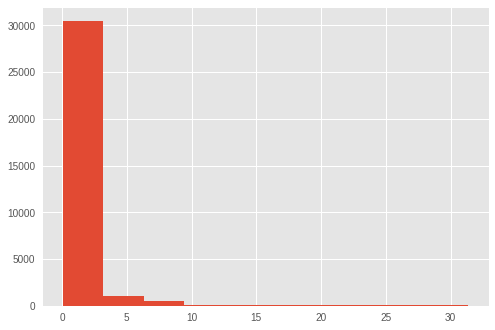

In [81]:
newvalues = [x for x in np.transpose(inputScaled)[25] if x > 0]

hist(newvalues)

In [1]:
len(np.transpose(inputsamples)[22])

NameError: name 'np' is not defined

In [32]:
inputScaled[0]

array([ 0.95060582,  0.28679416,  0.80358425,  0.41377061,  0.01838032,
        0.42984149, -0.20784585, -0.92419011,  2.78581377, -0.21177057,
        1.1912632 ,  0.85917961,  0.06009034, -0.54848072, -0.02069263,
       -0.51129192, -0.50755707,  1.88315873, -1.14115403, -0.09614064,
       -0.07432116, -0.08063285,  2.64828473, -0.08759506, -0.19174051,
       -0.16659475,  0.15803875,  0.40637098,  0.50482309])

In [7]:
scaler = StandardScaler()  
scaler.fit(inputsamples)
inputScaled = scaler.transform(inputsamples)

In [122]:
from sklearn.gaussian_process.kernels import Matern
def fitNN(samples, targets):
    clf = MLPRegressor(solver='adam', alpha=1e-5,hidden_layer_sizes=(16,16), random_state=None)
    clf.fit(samples, targets)
    return clf

def fitGP(samples, targets):
    clf = GaussianProcessRegressor()
    clf.fit(samples, targets)
    return clf


tf1 = fitNN(inputScaled[:200000], outputsamples[:200000])

In [123]:
tf1.predict(inputScaled[20000])

/tigress/BEE/mimic/usr/np6/miniconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  81.14494217,   22.24114964,   90.82729255,   70.0074345 ,
           7.53136237,   44.34039355,   41.60496695,    7.37587724,
         105.48975867,    8.24641498,   20.13622125,   16.8911583 ,
          19.22088251,    8.73530527,  330.48429956,    6.0238506 ,
           1.36413117,   29.12481039,   24.7747364 ,    2.98350929,
           4.31396838,  272.68790989,   99.3910991 ,   14.65457432,
           2.31714153,    4.27386903,    1.64703232]])

In [124]:
outputsamples[20000]

array([  82.  ,   26.  ,  100.  ,   62.  ,    2.  ,   50.  ,   42.  ,
          7.42,  102.  ,    6.  ,   11.  ,   11.  ,   20.  ,    8.8 ,
        314.  ,    5.  ,    1.1 ,   27.6 ,   31.  ,    0.  ,    0.  ,
          0.  ,  100.  ,    0.  ,    0.  ,    0.  ,    0.  ])

In [88]:
inputsamples[10]

array([  101.        ,    16.        ,   100.        ,    90.        ,
           9.24128353,    40.        ,    37.        ,     7.4       ,
         160.        ,     9.        ,    49.        ,    24.        ,
          19.        ,     8.5       ,   468.        ,     5.        ,
           0.8       ,    38.1       ,     6.        ,   115.        ,
          23.        ,    99.        ,    84.        ,     9.24128353,
          40.        ,    37.        ,     7.4       ,   160.        ,
           9.        ,    49.        ,    24.        ,    19.        ,
           8.5       ,   468.        ,     5.        ,     0.8       ,
          38.1       ,     6.        ,   102.        ,    22.        ,
          98.        ,    88.        ,     9.24128353,    40.        ,
          37.        ,     7.4       ,   160.        ,     9.        ,
          49.        ,    20.        ,    19.        ,    11.1       ,
         521.        ,     5.        ,     0.8       ,    38.1       ,
      

In [7]:
import pyGPs

In [27]:
x = np.array(inputScaled[:2000])
y = np.array(outputsamples[:2000])

In [28]:
m = pyGPs.mean.Linear( D=x.shape[1] ) + pyGPs.mean.Const()
k = pyGPs.cov.RBF()
model = pyGPs.GPR()      # specify model (GP regression)
model.setPrior(mean=m, kernel=k)

In [29]:
model.getPosterior(x, y) # fit default model (mean zero & rbf kernel) with data
model.optimize(x, y)     # optimize hyperparamters (default optimizer: single run minimize)

No handlers could be found for logger "pyGPs.Core.opt"


In [18]:
model.predict(inputScaled[20000])# predict test cases
#model.plot()             # and plot result

(200000, 29)

In [30]:
x_train = np.linspace(-3, 3, num=50)
y_train = np.cos(x_train) + np.random.normal(0, 0.1, size=50)
x_train = x_train.astype(np.float32).reshape((50, 1))
y_train = y_train.astype(np.float32).reshape((50, 1))

In [1]:
import tensorflow as tf
from edward.models import Normal

def neural_network(x, W_0, W_1, b_0, b_1):
    h = tf.tanh(tf.matmul(x, W_0) + b_0)
    h = tf.matmul(h, W_1) + b_1
    return tf.reshape(h, [-1])

W_0 = Normal(tf.zeros([D, 2]), tf.ones([D, 2]))
W_1 = Normal(tf.zeros([2, 1]), tf.ones([2, 1]))
b_0 = Normal(tf.zeros(2), tf.ones(2))
b_1 = Normal(tf.zeros(1), tf.ones(1))

x = x_train
y = Normal(neural_network(x, W_0, W_1, b_0, b_1), 0.1 * tf.ones(N))

KeyboardInterrupt: 

In [ ]:
qW_0 = Normal(tf.Variable(tf.random_normal([D, 2])),
              tf.nn.softplus(tf.Variable(tf.random_normal([D, 2]))))
qW_1 = Normal(tf.Variable(tf.random_normal([2, 1])),
              tf.nn.softplus(tf.Variable(tf.random_normal([2, 1]))))
qb_0 = Normal(tf.Variable(tf.random_normal([2])),
              tf.nn.softplus(tf.Variable(tf.random_normal([2]))))
qb_1 = Normal(tf.Variable(tf.random_normal([1])),
              tf.nn.softplus(tf.Variable(tf.random_normal([1]))))

In [ ]:
import edward as ed

inference = ed.KLqp({W_0: qW_0, b_0: qb_0,
                     W_1: qW_1, b_1: qb_1}, data={y: y_train})
inference.run(n_iter=1000)